### Install Required Libs

In [ ]:
!pip install -r requirements.txt

In [ ]:
%load_ext autoreload
%load_ext jupyter_black
%autoreload 2

In [3]:
class_map = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

show_summary = True
show_dataset_analyze = False
show_model_visualize = False

### Get Available Device

In [4]:
from utils import get_device

# Check GPU availability
use_cuda, device = get_device()

print(f"Device:{device}")

Device:cpu


### Prepare datasets & loaders

In [ ]:
from transform import get_mnist_transform, get_cifar10_transform
from datasets import get_minst_dataset, get_cifar10_dataset

train_transform = get_cifar10_transform("train")
test_transform = get_cifar10_transform("test")

train_data = get_cifar10_dataset("train", train_transform)
test_data = get_cifar10_dataset("test", test_transform)

In [6]:
from utils import get_data_loader

kwargs = {
    "batch_size": 512,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_loader = get_data_loader(train_data, kwargs)
test_loader = get_data_loader(test_data, kwargs)

## Dataset  basic Stats

In [7]:
from datasets import print_dataset_bstats

if show_dataset_analyze:
    print_dataset_bstats(train_data)

Data set size: 50000 elements
Image shape: torch.Size([3, 32, 32])
Mean: tensor([-0.1088, -0.1155, -0.1011])
Standard Deviation: tensor([1.0620, 1.0600, 1.0345])


## Calculate Class Scale

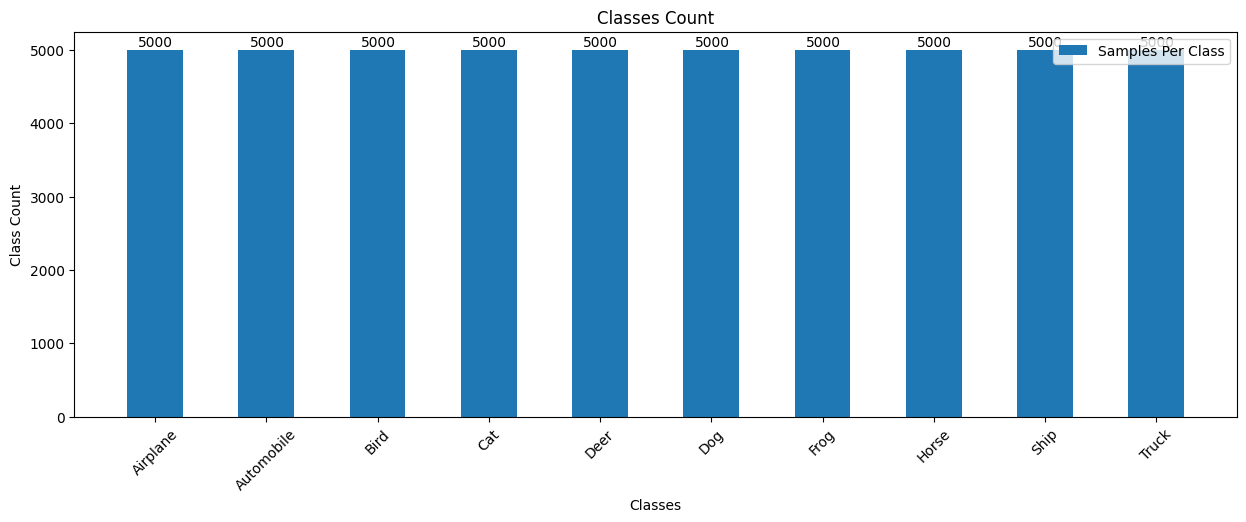

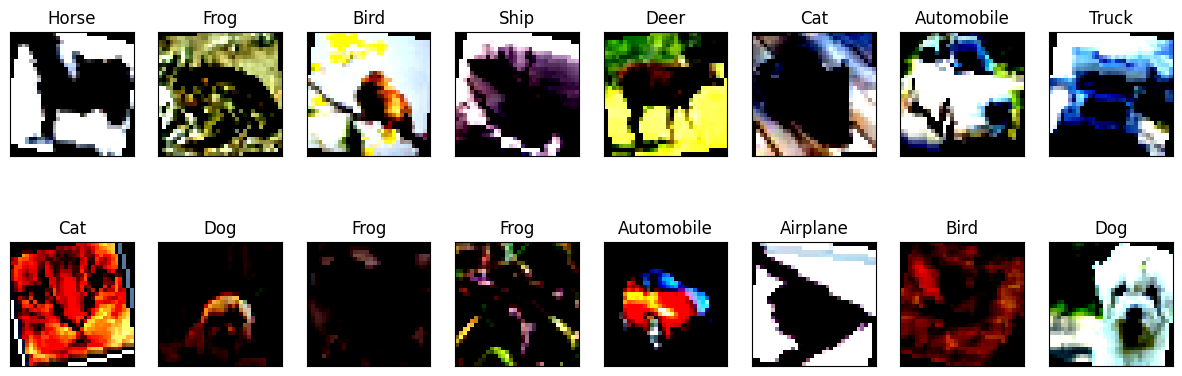

In [8]:
from visualize import print_class_scale, print_samples

if show_dataset_analyze:
    print_class_scale(train_loader, class_map)
    print_samples(train_loader, class_map)

### Save Model's Architecture as png file

In [9]:
from model import Net

if show_model_visualize:
    model = Net().to(device)
    model.model_visualize(device, train_loader, "model")

### Create and run all three model Pipelines

In [10]:
import torch.nn.functional as F

from utils import get_lr_scheduler
from backpropagation import ModelTrainPipeline

dropout = 0.1
epochs = 20
enable_skip_conn = True

trained_models = []
for norm in ["bn", "gn", "ln"]:
    mtp = ModelTrainPipeline(
        criteria=F.cross_entropy,
        train_loader=train_loader,
        test_loader=test_loader,
        epochs=epochs,
        device=device,
        norm=norm,
        dropout=dropout,
        skip_connets=enable_skip_conn,
        model_summary=True,
    )

    trained_models.append(mtp)

    # Start model training.
    mtp.run()

Device: cpu
Normalization: bn
Dropout: 0.1
Skip Connection: True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             108
              ReLU-2            [-1, 4, 32, 32]               0
       BatchNorm2d-3            [-1, 4, 32, 32]               8
           Dropout-4            [-1, 4, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             288
              ReLU-6            [-1, 8, 32, 32]               0
       BatchNorm2d-7            [-1, 8, 32, 32]              16
           Dropout-8            [-1, 8, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]             576
             ReLU-10            [-1, 8, 32, 32]               0
      BatchNorm2d-11            [-1, 8, 32, 32]              16
          Dropout-12            [-1, 8, 32, 32]               0
           Conv2d-13            [-1, 8

Train: Loss=2.0926 Batch_id=97 Accuracy=18.47: 100%|██████████| 98/98 [02:00<00:00,  1.23s/it]


Test set: Average loss: 2.1695, Accuracy: 1754/10000 (17.54%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.9820 Batch_id=97 Accuracy=23.81: 100%|██████████| 98/98 [01:58<00:00,  1.21s/it]


Test set: Average loss: 2.1779, Accuracy: 1699/10000 (16.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.8565 Batch_id=97 Accuracy=27.03: 100%|██████████| 98/98 [01:57<00:00,  1.20s/it]


Test set: Average loss: 2.0697, Accuracy: 1965/10000 (19.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.8262 Batch_id=97 Accuracy=29.75: 100%|██████████| 98/98 [01:59<00:00,  1.22s/it]


Test set: Average loss: 2.0550, Accuracy: 2205/10000 (22.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.8434 Batch_id=97 Accuracy=31.40: 100%|██████████| 98/98 [01:58<00:00,  1.21s/it]


Test set: Average loss: 2.0085, Accuracy: 2421/10000 (24.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=1.8108 Batch_id=97 Accuracy=32.45: 100%|██████████| 98/98 [01:58<00:00,  1.21s/it]


Test set: Average loss: 1.9647, Accuracy: 2584/10000 (25.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=1.7405 Batch_id=97 Accuracy=32.73: 100%|██████████| 98/98 [01:59<00:00,  1.22s/it]


Test set: Average loss: 2.0196, Accuracy: 2499/10000 (24.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.7802 Batch_id=97 Accuracy=33.03: 100%|██████████| 98/98 [01:59<00:00,  1.22s/it]


Test set: Average loss: 1.9077, Accuracy: 2801/10000 (28.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=1.6819 Batch_id=97 Accuracy=34.02: 100%|██████████| 98/98 [01:59<00:00,  1.22s/it]


Test set: Average loss: 1.8964, Accuracy: 2861/10000 (28.61%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=1.8268 Batch_id=97 Accuracy=35.37: 100%|██████████| 98/98 [01:59<00:00,  1.22s/it]


Test set: Average loss: 1.8283, Accuracy: 3085/10000 (30.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=1.7135 Batch_id=97 Accuracy=36.12: 100%|██████████| 98/98 [01:59<00:00,  1.21s/it]


Test set: Average loss: 1.7669, Accuracy: 3339/10000 (33.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=1.7044 Batch_id=97 Accuracy=36.83: 100%|██████████| 98/98 [01:59<00:00,  1.22s/it]


Test set: Average loss: 1.7777, Accuracy: 3468/10000 (34.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=1.6579 Batch_id=97 Accuracy=37.67: 100%|██████████| 98/98 [01:59<00:00,  1.22s/it]


Test set: Average loss: 1.7173, Accuracy: 3691/10000 (36.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=1.7049 Batch_id=97 Accuracy=38.20: 100%|██████████| 98/98 [01:59<00:00,  1.21s/it]


Test set: Average loss: 1.6863, Accuracy: 3833/10000 (38.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=1.7452 Batch_id=97 Accuracy=38.69: 100%|██████████| 98/98 [01:59<00:00,  1.22s/it]


Test set: Average loss: 1.6928, Accuracy: 3856/10000 (38.56%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=1.5730 Batch_id=97 Accuracy=39.06: 100%|██████████| 98/98 [01:58<00:00,  1.21s/it]


Test set: Average loss: 1.6703, Accuracy: 3881/10000 (38.81%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=1.6071 Batch_id=97 Accuracy=39.45: 100%|██████████| 98/98 [01:58<00:00,  1.21s/it]


Test set: Average loss: 1.6841, Accuracy: 3881/10000 (38.81%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=1.5831 Batch_id=97 Accuracy=39.21: 100%|██████████| 98/98 [01:59<00:00,  1.22s/it]


Test set: Average loss: 1.6721, Accuracy: 3892/10000 (38.92%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=1.6278 Batch_id=97 Accuracy=39.15: 100%|██████████| 98/98 [01:59<00:00,  1.22s/it]


Test set: Average loss: 1.6719, Accuracy: 3898/10000 (38.98%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=1.6760 Batch_id=97 Accuracy=39.68: 100%|██████████| 98/98 [01:59<00:00,  1.22s/it]


Test set: Average loss: 1.6685, Accuracy: 3897/10000 (38.97%)

Adjusting learning rate of group 0 to 1.0000e-03.
****************************************************************
Device: cpu
Normalization: gn
Dropout: 0.1
Skip Connection: True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             108
              ReLU-2            [-1, 4, 32, 32]               0
         GroupNorm-3            [-1, 4, 32, 32]               8
           Dropout-4            [-1, 4, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             288
              ReLU-6            [-1, 8, 32, 32]               0
         GroupNorm-7            [-1, 8, 32, 32]              16
           Dropout-8            [-1, 8, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]             576
             ReLU-10            [-1, 8, 32, 32]     

Train: Loss=2.2701 Batch_id=97 Accuracy=13.32: 100%|██████████| 98/98 [01:49<00:00,  1.12s/it]


Test set: Average loss: 2.2414, Accuracy: 1748/10000 (17.48%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.1022 Batch_id=97 Accuracy=19.57: 100%|██████████| 98/98 [01:49<00:00,  1.12s/it]


Test set: Average loss: 2.0918, Accuracy: 2029/10000 (20.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=2.0332 Batch_id=97 Accuracy=22.03: 100%|██████████| 98/98 [01:50<00:00,  1.12s/it]


Test set: Average loss: 2.0531, Accuracy: 2185/10000 (21.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.9793 Batch_id=97 Accuracy=23.38: 100%|██████████| 98/98 [01:50<00:00,  1.12s/it]


Test set: Average loss: 2.0403, Accuracy: 2193/10000 (21.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=2.0723 Batch_id=97 Accuracy=24.15: 100%|██████████| 98/98 [01:49<00:00,  1.12s/it]


Test set: Average loss: 1.9884, Accuracy: 2427/10000 (24.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=1.9639 Batch_id=97 Accuracy=25.43: 100%|██████████| 98/98 [01:51<00:00,  1.13s/it]


Test set: Average loss: 1.9470, Accuracy: 2515/10000 (25.15%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=1.9120 Batch_id=97 Accuracy=26.37: 100%|██████████| 98/98 [01:50<00:00,  1.13s/it]


Test set: Average loss: 1.9293, Accuracy: 2681/10000 (26.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.9106 Batch_id=97 Accuracy=27.94: 100%|██████████| 98/98 [01:48<00:00,  1.11s/it]


Test set: Average loss: 1.8827, Accuracy: 2900/10000 (29.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=1.9696 Batch_id=97 Accuracy=28.87: 100%|██████████| 98/98 [01:47<00:00,  1.10s/it]


Test set: Average loss: 1.8457, Accuracy: 3140/10000 (31.40%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=1.8373 Batch_id=97 Accuracy=29.77: 100%|██████████| 98/98 [01:48<00:00,  1.11s/it]


Test set: Average loss: 1.8598, Accuracy: 3149/10000 (31.49%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=1.9309 Batch_id=97 Accuracy=31.23: 100%|██████████| 98/98 [01:48<00:00,  1.10s/it]


Test set: Average loss: 1.8157, Accuracy: 3407/10000 (34.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=1.8154 Batch_id=97 Accuracy=32.09: 100%|██████████| 98/98 [01:48<00:00,  1.11s/it]


Test set: Average loss: 1.8283, Accuracy: 3328/10000 (33.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=1.8319 Batch_id=97 Accuracy=33.29: 100%|██████████| 98/98 [01:49<00:00,  1.12s/it]


Test set: Average loss: 1.9289, Accuracy: 2990/10000 (29.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=1.7227 Batch_id=97 Accuracy=33.58: 100%|██████████| 98/98 [01:50<00:00,  1.12s/it]


Test set: Average loss: 1.7432, Accuracy: 3636/10000 (36.36%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=1.7825 Batch_id=97 Accuracy=34.32: 100%|██████████| 98/98 [01:49<00:00,  1.11s/it]


Test set: Average loss: 1.7701, Accuracy: 3565/10000 (35.65%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=1.7578 Batch_id=97 Accuracy=36.00: 100%|██████████| 98/98 [01:49<00:00,  1.11s/it]


Test set: Average loss: 1.7435, Accuracy: 3670/10000 (36.70%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=1.7310 Batch_id=97 Accuracy=35.97: 100%|██████████| 98/98 [01:49<00:00,  1.11s/it]


Test set: Average loss: 1.7408, Accuracy: 3671/10000 (36.71%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=1.8145 Batch_id=97 Accuracy=35.95: 100%|██████████| 98/98 [01:49<00:00,  1.12s/it]


Test set: Average loss: 1.7504, Accuracy: 3628/10000 (36.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=1.7586 Batch_id=97 Accuracy=36.18: 100%|██████████| 98/98 [01:49<00:00,  1.12s/it]


Test set: Average loss: 1.7399, Accuracy: 3661/10000 (36.61%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=1.6607 Batch_id=97 Accuracy=36.24: 100%|██████████| 98/98 [01:49<00:00,  1.12s/it]


Test set: Average loss: 1.7411, Accuracy: 3671/10000 (36.71%)

Adjusting learning rate of group 0 to 1.0000e-03.
****************************************************************
Device: cpu
Normalization: ln
Dropout: 0.1
Skip Connection: True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             108
              ReLU-2            [-1, 4, 32, 32]               0
         GroupNorm-3            [-1, 4, 32, 32]               8
           Dropout-4            [-1, 4, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             288
              ReLU-6            [-1, 8, 32, 32]               0
         GroupNorm-7            [-1, 8, 32, 32]              16
           Dropout-8            [-1, 8, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]             576
             ReLU-10            [-1, 8, 32, 32]     

Train: Loss=2.1082 Batch_id=97 Accuracy=16.57: 100%|██████████| 98/98 [01:50<00:00,  1.12s/it]


Test set: Average loss: 2.1093, Accuracy: 1786/10000 (17.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.0322 Batch_id=97 Accuracy=19.68: 100%|██████████| 98/98 [01:50<00:00,  1.12s/it]


Test set: Average loss: 2.0496, Accuracy: 2079/10000 (20.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=2.0146 Batch_id=97 Accuracy=22.58: 100%|██████████| 98/98 [01:49<00:00,  1.12s/it]


Test set: Average loss: 2.0190, Accuracy: 2219/10000 (22.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.9665 Batch_id=97 Accuracy=24.27: 100%|██████████| 98/98 [01:49<00:00,  1.12s/it]


Test set: Average loss: 1.9994, Accuracy: 2407/10000 (24.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=2.0125 Batch_id=97 Accuracy=25.35: 100%|██████████| 98/98 [01:48<00:00,  1.11s/it]


Test set: Average loss: 1.9436, Accuracy: 2577/10000 (25.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=1.9700 Batch_id=97 Accuracy=26.80: 100%|██████████| 98/98 [01:49<00:00,  1.11s/it]


Test set: Average loss: 1.8836, Accuracy: 2828/10000 (28.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=1.8921 Batch_id=97 Accuracy=28.02: 100%|██████████| 98/98 [01:48<00:00,  1.11s/it]


Test set: Average loss: 1.8486, Accuracy: 2944/10000 (29.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.9653 Batch_id=97 Accuracy=29.03: 100%|██████████| 98/98 [01:50<00:00,  1.12s/it]


Test set: Average loss: 1.9106, Accuracy: 2803/10000 (28.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=1.9167 Batch_id=97 Accuracy=30.04: 100%|██████████| 98/98 [01:49<00:00,  1.12s/it]


Test set: Average loss: 1.8199, Accuracy: 3102/10000 (31.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=1.8347 Batch_id=97 Accuracy=30.84: 100%|██████████| 98/98 [01:50<00:00,  1.12s/it]


Test set: Average loss: 1.7754, Accuracy: 3328/10000 (33.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=1.8439 Batch_id=97 Accuracy=32.14: 100%|██████████| 98/98 [01:48<00:00,  1.11s/it]


Test set: Average loss: 1.7860, Accuracy: 3332/10000 (33.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=1.8432 Batch_id=97 Accuracy=32.59: 100%|██████████| 98/98 [01:50<00:00,  1.13s/it]


Test set: Average loss: 1.7666, Accuracy: 3386/10000 (33.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=1.8526 Batch_id=97 Accuracy=33.21: 100%|██████████| 98/98 [01:48<00:00,  1.11s/it]


Test set: Average loss: 1.7661, Accuracy: 3450/10000 (34.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=1.7149 Batch_id=97 Accuracy=34.08: 100%|██████████| 98/98 [01:49<00:00,  1.11s/it]


Test set: Average loss: 1.7385, Accuracy: 3588/10000 (35.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=1.8058 Batch_id=97 Accuracy=34.59: 100%|██████████| 98/98 [01:50<00:00,  1.13s/it]


Test set: Average loss: 1.7042, Accuracy: 3710/10000 (37.10%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=1.6898 Batch_id=97 Accuracy=35.95: 100%|██████████| 98/98 [01:48<00:00,  1.11s/it]


Test set: Average loss: 1.6937, Accuracy: 3709/10000 (37.09%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=1.7111 Batch_id=97 Accuracy=35.88: 100%|██████████| 98/98 [01:50<00:00,  1.12s/it]


Test set: Average loss: 1.7010, Accuracy: 3678/10000 (36.78%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=1.7051 Batch_id=97 Accuracy=35.75: 100%|██████████| 98/98 [01:48<00:00,  1.11s/it]


Test set: Average loss: 1.6939, Accuracy: 3704/10000 (37.04%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=1.6781 Batch_id=97 Accuracy=35.77: 100%|██████████| 98/98 [01:50<00:00,  1.12s/it]


Test set: Average loss: 1.6990, Accuracy: 3692/10000 (36.92%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=1.6781 Batch_id=97 Accuracy=36.14: 100%|██████████| 98/98 [01:48<00:00,  1.11s/it]


Test set: Average loss: 1.6885, Accuracy: 3704/10000 (37.04%)

Adjusting learning rate of group 0 to 1.0000e-03.
****************************************************************


## Comparing different type of Normalizations

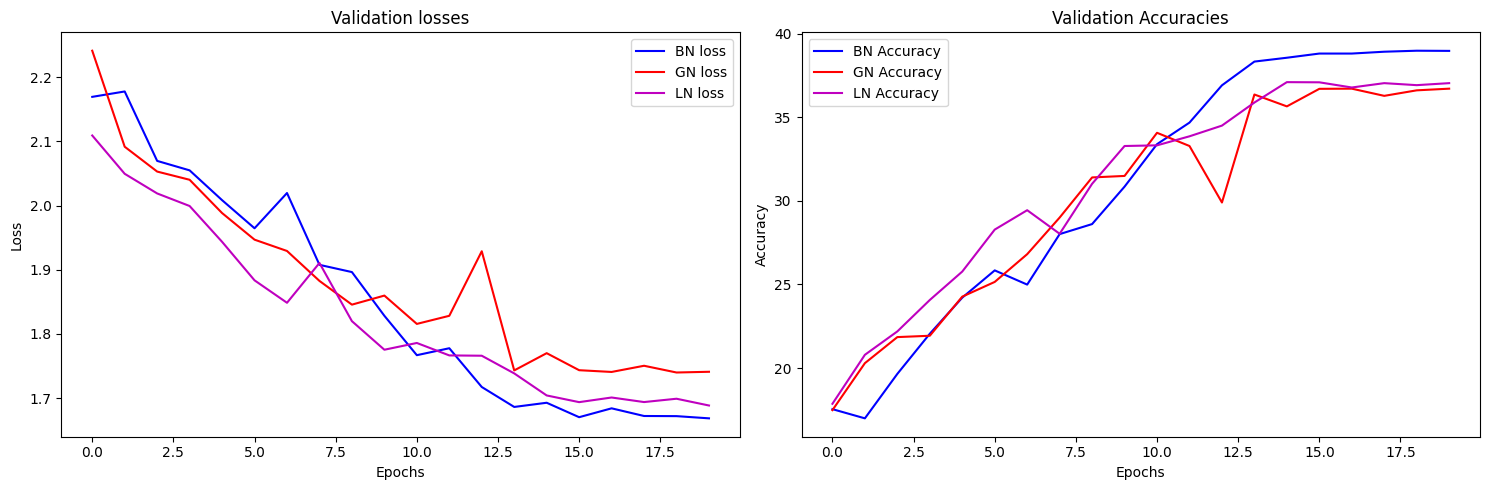

In [13]:
from visualize import plot_model_comparison

plot_model_comparison(trained_models, epochs)

## Training & Test accuracies for all models

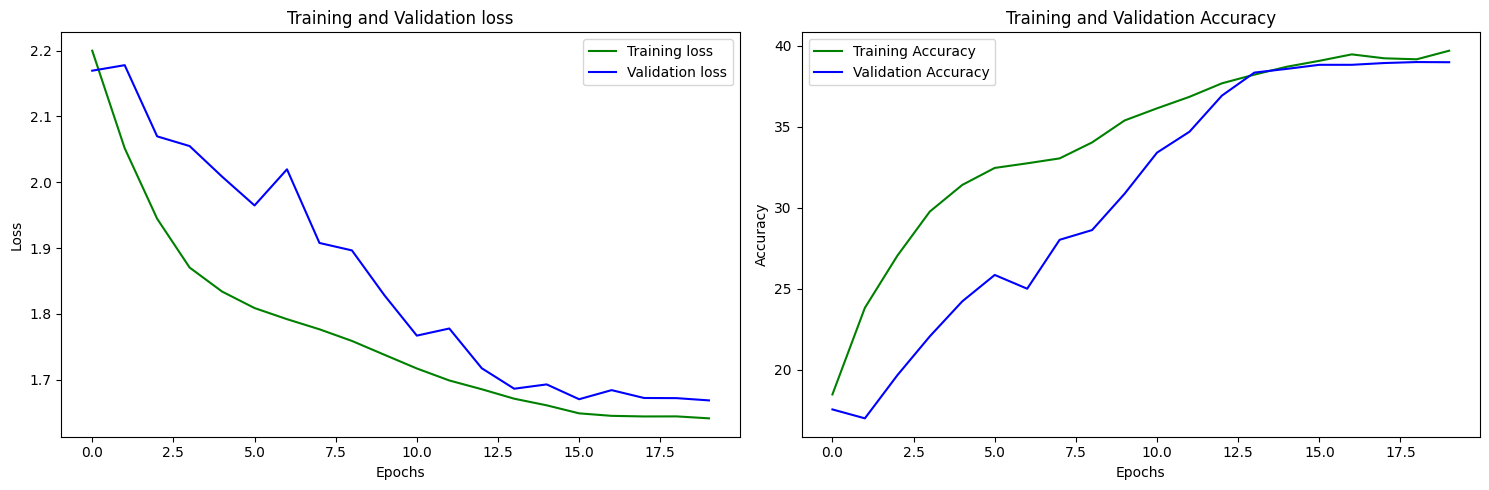

Confusion matrix, without normalization


Total Incorrect Predictions 6103


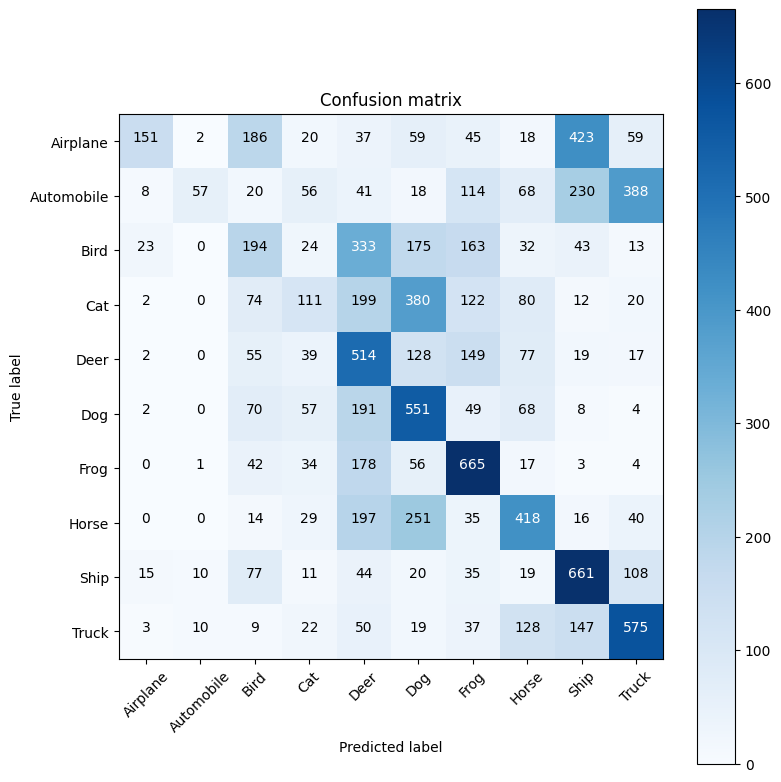

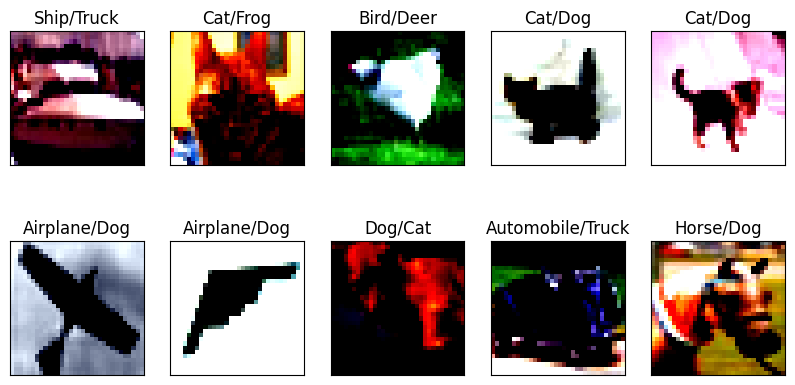

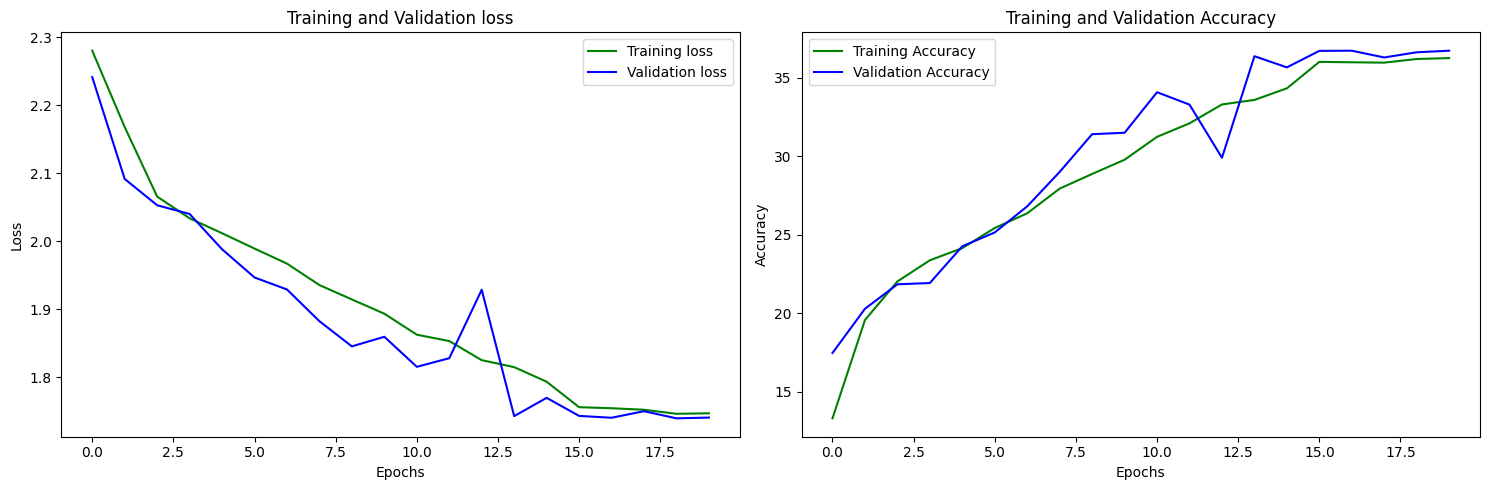

Confusion matrix, without normalization


Total Incorrect Predictions 6329


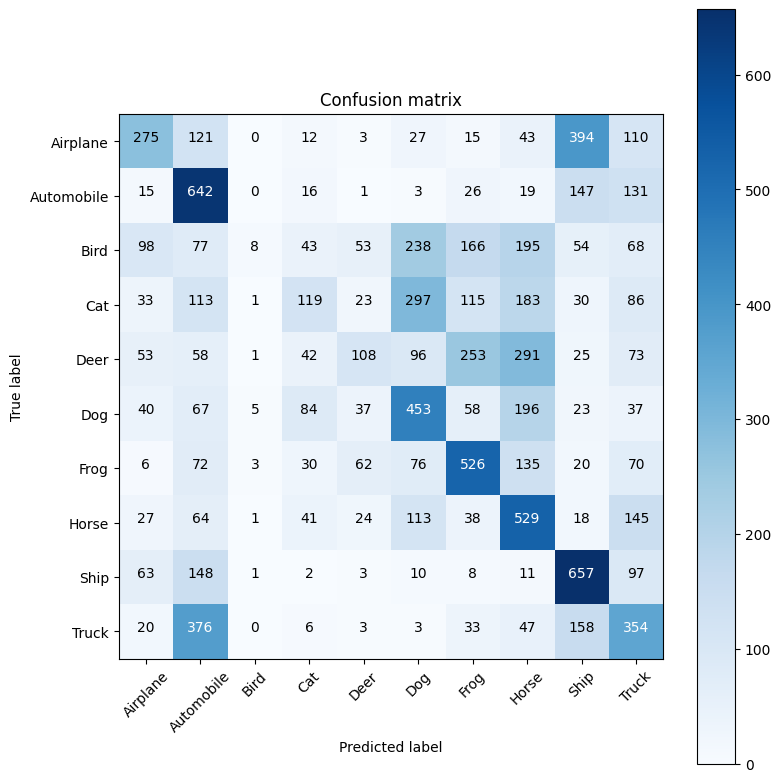

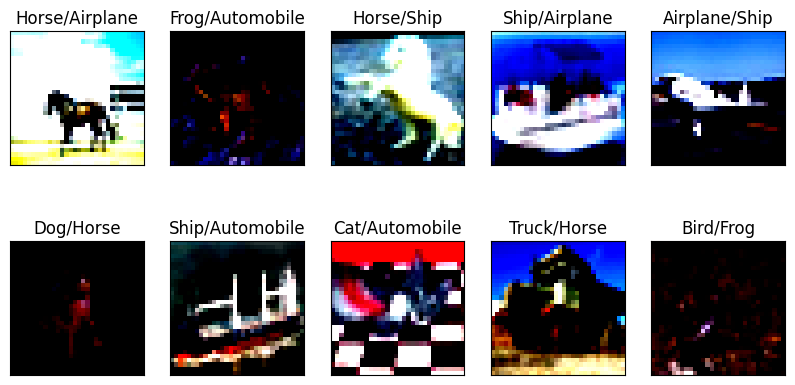

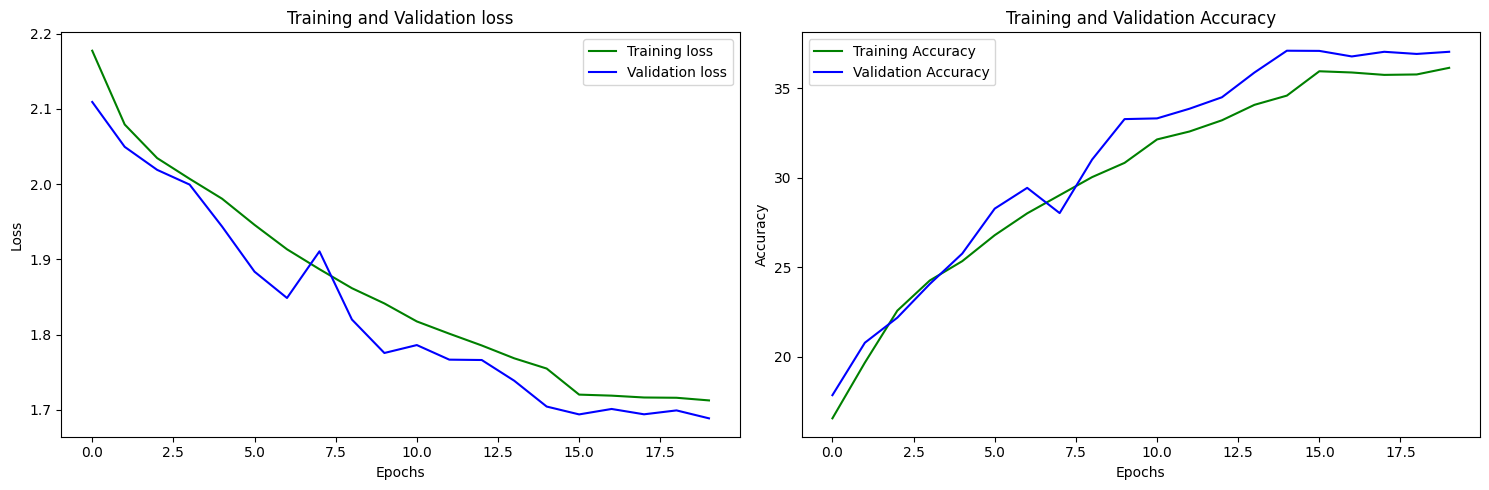

Confusion matrix, without normalization


Total Incorrect Predictions 6296


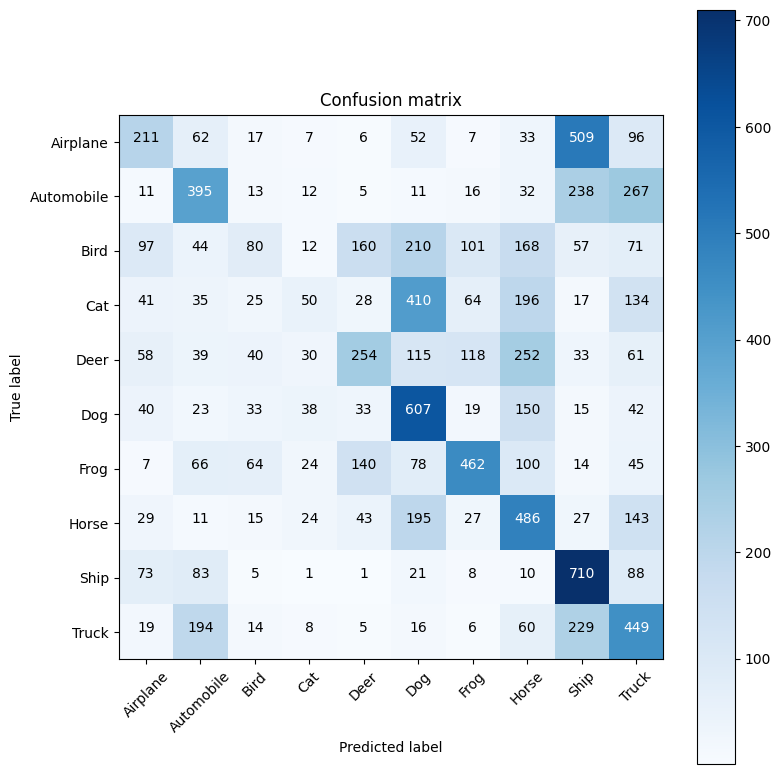

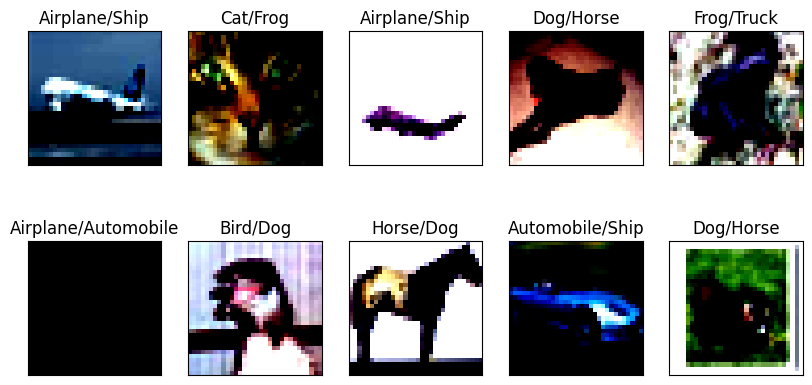

In [14]:
for trainer in trained_models:
    trainer.print_performance(class_map)